In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
from tqdm import tqdm 
tqdm.pandas()
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')
import os
os.chdir('../')
from python_code import new_new_gibbs
os.chdir('notebooks')
from sklearn.decomposition import PCA


In [2]:
pca = PCA(n_components=2)
df = pd.read_csv('../data/all_data.csv')
df = df.drop(columns='transit_stations_percent_change_from_baseline')
df = df.dropna()
df['department_name'] = df['department_name'].apply(lambda x: " ".join(x.split(' ')[:-1]))
X_transformed = pca.fit_transform(df[df.columns[np.r_[1:6]]])
df['component_1'] = X_transformed[:,0]
df['component_2'] = X_transformed[:,1]
df['intercept'] = 1
grouped_df = df.groupby('department_name')
groups = list(grouped_df.groups.keys())
X_depts, y_depts = [], []
pca = PCA(n_components=2)
time_vecs = []
date_vecs = []
for n, dept in enumerate(groups):
    df_dept = grouped_df.get_group(dept)
    df_dept = df_dept.sort_values('date')
    date_vecs.append(df_dept['date'])
    X = df_dept[['intercept','component_1','component_2']].to_numpy()
    y = df_dept['incidents'].to_numpy()
    X_depts.append(X)
    y_depts.append(y.flatten())
    df_dept['day_of_the_year'] = pd.to_datetime(df_dept['date']).dt.day_of_year
    time_vecs.append(df_dept['day_of_the_year'].to_numpy())

In [ ]:
with open(f'traces{i}.pickle', 'wb') as handle:
    pickle.dump(gb.traces, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
for i in range(3,5):   
    gb = new_new_gibbs.GibbsSampler(X_depts, y_depts, time_vecs, n_iter=10000, burn=1000, bandwidth_start=5, tau_sq_1_start=1000, f_start=-5, sigmas_start=25)
    gb.fit()
    with open(f'traces{i}.pickle', 'wb') as handle:
        pickle.dump(gb.traces, handle, protocol=pickle.HIGHEST_PROTOCOL)
        

  1%|█▊                                                                                                                                                                                       | 96/10000 [00:31<57:24,  2.88it/s]/Users/juliette/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
  1%|██                                                                                                                                                                                      | 114/10000 [00:37<50:34,  3.26it/s]

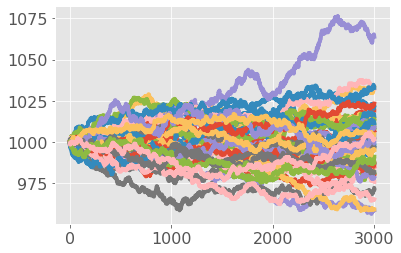

In [15]:
plt.plot(gb.traces['tau_sq_1s']);

In [5]:
from scipy.stats import uniform
uniform(0,1).logpdf(5)

-inf

In [7]:
gb.sigmas_squared

array([ 747.68690552, 1648.46327001, 1727.06583132,  297.27810241,
        827.74573485, 1426.81752246, 1068.94385686,  608.66917241,
       1390.70521901, 3128.13814152, 2931.31965069, 1045.36984551,
       1805.01103751,  298.73013237,  900.99725725, 1909.27395189,
       1193.63656779, 3993.27184159, 1775.47813871, 2043.42620418,
       1249.22669421, 1420.94809684, 2680.92419946,  587.97454809,
        908.62128205,  607.18710457, 1580.17365889, 1499.37599969,
        546.67930922, 1526.3744501 , 1492.35559002,  562.84001285,
        983.21933233, 1760.86479941, 1938.35797074,  396.67274109,
       2215.88607401,  559.11908953, 1364.45584323,  242.79807907,
       3253.28782808,  810.18104856])

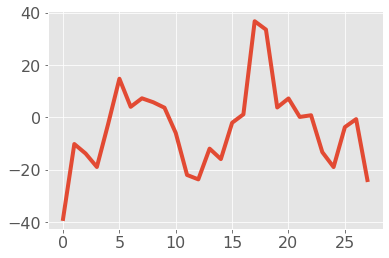

In [8]:
plt.plot(gb.f[3])

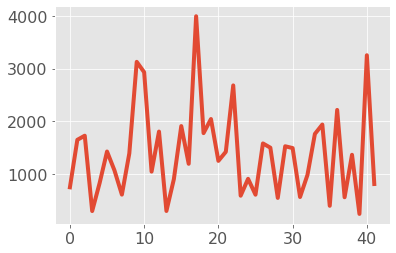

In [9]:
plt.plot(gb.sigmas_squared)

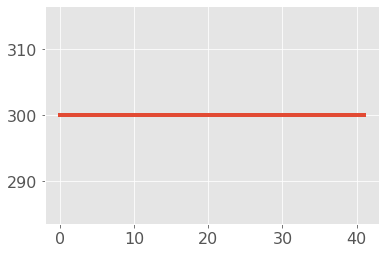

In [10]:
plt.plot(gb.bandwidths)

In [11]:
import pickle
with open('../python_code/traces11.pickle', 'rb') as handle:
    traces1 = pickle.load(handle)
with open('../python_code/traces22.pickle', 'rb') as handle:
    traces2 = pickle.load(handle)
#with open('../python_code/traces3.pickle', 'rb') as handle:
   # traces3 = pickle.load(handle)
## open('traces3.pickle', 'rb') as handle:
 #   traces4 = pickle.load(handle)

UnpicklingError: pickle data was truncated

In [ ]:
#n=
word = 'tau_sq_1s'
plt.plot(traces1[word][:,10]);
plt.plot(traces2[word][:,n]);
#plt.plot(traces3[word][:,n]);
#plt.plot(traces4[word][:,n]);
#plt.ylim(0,400)

In [ ]:
plt.plot(traces1['betas'][:,0,7]);
#plt.plot(traces2['betas'][:,0,41]);



In [ ]:
plt.plot(traces1['accept_bandwidth'].mean(axis=0))

In [ ]:
all_traces = [traces1, traces2, traces3, traces4]
bandwidths_init = traces2['bandwidths'][-1, :] 
tau_sq_init = traces2['tau_sq_1s'][-1, :]

In [ ]:
#plt.plot(traces2['sigmas_squared'][:,5]);
plt.plot(traces3['sigmas_squared'][:,5]);

#plt.plot(traces2['betas'][:,2,10]);
#plt.plot(traces3['betas'][:,2,10]);
#plt.plot(traces4['betas'][:,2,10]);



#plt.xlim(2000, 7000)
#plt.ylim(-.1,0.1)


In [ ]:
import pickle
for i in range(4):
    gb = new_gibbs.GibbsSampler(X_depts, y_depts, time_vecs, n_iter=10000, burn=0, bandwidth_start=bandwidths_init, tau_sq_1_start=tau_sq_init, f_start=5)
    gb.fit()
    with open(f'traces{i}.pickle', 'wb') as handle:
        pickle.dump(gb.traces, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
plt.plot(gb.accept_bandwidth.mean(axis=0))
plt.plot(gb.accept_tau.mean(axis=0))

In [ ]:
plt.plot(gb.traces['bandwidths'][:,18], alpha=.7);

In [ ]:
n_groups = 42

In [ ]:
all_traces = [traces1, traces2, traces3, traces4]


In [ ]:
def get_means(traces, n_groups):
    f = [pd.DataFrame(traces['f'][n][5000:]).dropna(axis=1).mean(axis=1).to_numpy() for n in range(n_groups)]
    betas = np.nanmean(traces['betas'][5000:], axis=0)
    mu = np.nanmean(traces['mu'][5000:], axis=0)
    return f, betas, mu
    

f1, betas1, mu1 = get_means(traces1, n_groups)
f2, betas2, mu2 = get_means(traces2, n_groups)
f3, betas3, mu3 = get_means(traces3, n_groups)
f4, betas4, mu4 = get_means(traces4, n_groups)

In [ ]:
traces2['taus'][2,:]

In [ ]:
(traces4['bandwidths'] > 150).sum()

In [ ]:
#plt.plot(traces1['sigmas_squared'][:,15], alpha=.7);
plt.plot(traces2['bandwidths'][:,10], alpha=.7);
plt.plot(traces3['bandwidths'][:,10], alpha=.7);
plt.plot(traces1['bandwidths'][:,10], alpha=.7);
plt.plot(traces4['bandwidths'][:,10], alpha=.7);
#plt.plot(traces4['sigmas_squared'][:,15], alpha=.7);
#plt.ylim(0,500);

In [ ]:
## plt.plot(traces1['mu'][:,2]);
plt.plot(traces2['mu'][:,2]);
plt.plot(traces3['mu'][:,2]);
plt.plot(traces4['mu'][:,2]);

In [ ]:
def calculate_gelman_rubin_stat(four_traces):
    L = len(four_traces[0])
    J = 4
    chain_means = [np.nanmean(trace) for trace in four_traces]
    grand_mean = np.mean(chain_means)
    B = L*np.var(chain_means, ddof=1)
    within_var = [np.nanvar(trace, ddof=1) for trace in four_traces]
    W = np.mean(within_var)
    return (((L-1)/L * W) + 1/L * B)/W

In [ ]:
four_traces = [trace['mu'][5000:,2] for trace in all_traces]
calculate_gelman_rubin_stat(four_traces)


In [ ]:
four_traces = [trace['bandwidths'][5000:, 40] for trace in all_traces]
calculate_gelman_rubin_stat(four_traces)

In [ ]:
four_traces = [traces['f'][12][8, :] for traces in all_traces]
calculate_gelman_rubin_stat(four_traces)

In [ ]:
traces1['f'][0].shape

In [ ]:
L=20000
J = 4

In [ ]:
var = [np.nanvar(traces['mu'][5000:,], ddof=1) for traces in all_traces]
W = np.mean(var)

In [ ]:
gb = new_gibbs.GibbsSampler(X_depts, y_depts, time_vecs, n_iter=3000, burn=0, bandwidth_start=9, tau_sq_1_start=3000, f_start=0)
gb.fit()

In [ ]:
gb.traces['bandwidths'][gb.traces['bandwidths'] > 100]

In [ ]:
plt.plot(gb.traces['bandwidths']);

In [ ]:
plt.plot(gb.accept_bandwidth.mean(axis=0))
plt.plot(gb.accept_tau.mean(axis=0))

In [ ]:
np.log(1/0)

In [ ]:
np.log(0) + 1

In [ ]:
np.log(0) - np.log(0)

In [ ]:
from scipy.stats import uniform

In [ ]:
np.log(uniform.rvs()) > -np.inf